# Support Vector Regression Models, (Lineal, Polinomial, RBF)

### Importamos las librerias a usar

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


### Cargamos y leemos la data

In [10]:
data = pd.read_csv('./MSFT.csv')
data = data.head(20)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-26,289.000000,289.690002,286.640015,289.049988,286.708832,23176100
1,2021-07-27,289.429993,289.579987,282.950012,286.540009,284.219208,33604100
2,2021-07-28,288.989990,290.149994,283.829987,286.220001,283.901764,33566900
3,2021-07-29,286.239990,288.619995,286.079987,286.500000,284.179535,18168300
4,2021-07-30,285.170013,286.660004,283.910004,284.910004,282.602417,20944800
5,2021-08-02,286.359985,286.769989,283.739990,284.820007,282.513153,16267400
6,2021-08-03,285.420013,287.230011,284.000000,287.119995,284.794525,17879000
7,2021-08-04,286.220001,287.589996,284.649994,286.510010,284.189423,16191300
8,2021-08-05,286.880005,289.630005,286.100006,289.519989,287.175018,13900200
9,2021-08-06,288.510010,289.500000,287.619995,289.459991,287.115540,16589300


### Definimos arrays para 'dfdates' y 'dfprices'

In [3]:
dfdates  = []
dfprices = []

## Vemos si se guardo correctamente

In [8]:
dfdates , dfprices 

([1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0],
 [299.720001,
  288.690002,
  292.040009,
  292.390015,
  293.190002,
  289.480011,
  286.630005,
  287.209991,
  288.799988,
  289.75,
  288.51001,
  286.880005,
  286.220001,
  285.420013,
  286.359985,
  285.170013,
  286.23999,
  288.98999,
  289.429993])

### Funciones para trabajar con nuestra data

In [4]:
#Funcion para trabajar con pandas
def gd(dataframe):
    i = 1.0
    while i < len(dataframe):
        a = dataframe.xs(i)
        #print(a)
        dfdates.append(i)
        #print(dates)
        dfprices.append(a[1])
        i += 1
    return


#Funcion para trabajar localmente con archivos csv
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)	# skipping column names
        i = 1.0
        for row in csvFileReader:
            csvdates.append(i)
            #print(dates)
            csvprices.append(float(row[1]))
            i += 1
    return

### Función predictora

In [5]:
#Funcion predictora de precios
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    svr_lin = SVR(kernel= 'linear', C= 1e3)
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    svr_rbf.fit(dates, prices) # fitting the data points in the models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)

    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    #Retornamos los precios predecidos según la fecha
    return svr_rbf.predict(dates)[0], svr_lin.predict(dates)[0], svr_poly.predict(dates)[0]


### Hacemos la predicción y mostramos los valores finales

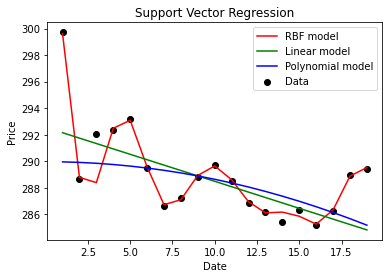

RBF: 299.6197862358488 LIN: 292.1533253333329 POLY: 289.95783078316305


In [6]:
gd(data)

#La lista de precios a la inversa
dfprices.reverse()

#Modelo de entrenamiento

predicted_price = predict_prices(dfdates, dfprices, 20)

#Imprimimos los valores que nos devuelve la función predicitora
print("RBF:", predicted_price[0],"LIN:", predicted_price[1],"POLY:", predicted_price[2])